In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import pymc


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
data = pd.read_table('/Users/TracyShields/pl2017.txt', index_col='Unnamed: 0')
data.index = data.columns

In [7]:
data

,ARS,BOU,BUR,CHE,CRY,EVE,HUL,LEI,LIV,MCI,MUN,MID,SOU,STK,SUN,SWA,TOT,WAT,WBA,WHU
ARS,—,3–1,2–1,3–0,2–0,3–1,2–0,1–0,3–4,2–2,2–0,0–0,2–1,3–1,2–0,3–2,1–1,1–2,1–0,3–0
BOU,3–3,—,2–1,1–3,0–2,1–0,6–1,1–0,4–3,0–2,1–3,4–0,1–3,2–2,1–2,2–0,0–0,2–2,1–0,3–2
BUR,0–1,3–2,—,1–1,3–2,2–1,1–1,1–0,2–0,1–2,0–2,1–0,1–0,1–0,4–1,0–1,0–2,2–0,2–2,1–2
CHE,3–1,3–0,3–0,—,1–2,5–0,2–0,3–0,1–2,2–1,4–0,3–0,4–2,4–2,5–1,3–1,2–1,4–3,1–0,2–1
CRY,3–0,1–1,0–2,0–1,—,0–1,4–0,2–2,2–4,1–2,1–2,1–0,3–0,4–1,0–4,1–2,0–1,1–0,0–1,0–1
EVE,2–1,6–3,3–1,0–3,1–1,—,4–0,4–2,0–1,4–0,1–1,3–1,3–0,1–0,2–0,1–1,1–1,1–0,3–0,2–0
HUL,1–4,3–1,1–1,0–2,3–3,2–2,—,2–1,2–0,0–3,0–1,4–2,2–1,0–2,0–2,2–1,1–7,2–0,1–1,2–1
LEI,0–0,1–1,3–0,0–3,3–1,0–2,3–1,—,3–1,4–2,0–3,2–2,0–0,2–0,2–0,2–1,1–6,3–0,1–2,1–0
LIV,3–1,2–2,2–1,1–1,1–2,3–1,5–1,4–1,—,1–0,0–0,3–0,0–0,4–1,2–0,2–3,2–0,6–1,2–1,2–2
MCI,2–1,4–0,2–1,1–3,5–0,1–1,3–1,2–1,1–1,—,0–0,1–1,1–1,0–0,2–1,2–1,2–2,2–0,3–1,3–1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, ARS to WHU
Data columns (total 20 columns):
ARS    20 non-null object
BOU    20 non-null object
BUR    20 non-null object
CHE    20 non-null object
CRY    20 non-null object
EVE    20 non-null object
HUL    20 non-null object
LEI    20 non-null object
LIV    20 non-null object
MCI    20 non-null object
MUN    20 non-null object
MID    20 non-null object
SOU    20 non-null object
STK    20 non-null object
SUN    20 non-null object
SWA    20 non-null object
TOT    20 non-null object
WAT    20 non-null object
WBA    20 non-null object
WHU    20 non-null object
dtypes: object(20)
memory usage: 3.9+ KB


In [10]:
rows = []
for i in data.index:
    for c in data.columns:
        if i == c: continue
        score = data.ix[i, c]
        rows.append([i, c, score[0], score[2:]])
        

In [11]:
df = pd.DataFrame(rows, columns = ['home', 'away', 'home_score', 'away_score'])
df.head()

,home,away,home_score,away_score
0,ARS,BOU,3,1
1,ARS,BUR,2,1
2,ARS,CHE,3,0
3,ARS,CRY,2,0
4,ARS,EVE,3,1


In [12]:
teams = df.home.unique()
teams = pd.DataFrame(teams, columns=['team'])
teams['i'] = teams.index
teams

,team,i
0,ARS,0
1,BOU,1
2,BUR,2
3,CHE,3
4,CRY,4
5,EVE,5
6,HUL,6
7,LEI,7
8,LIV,8
9,MCI,9


In [143]:
df = pd.merge(df, teams, left_on='home', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_home'}).drop('team', 1)
df = pd.merge(df, teams, left_on='away', right_on='team', how='left')
df = df.rename(columns = {'i': 'i_away'}).drop('team', 1)
df.head(10)

,home,away,home_score,away_score,i_home,i_away,i_home,i_away
0,ARS,BOU,3,1,0,1,0,1
1,ARS,BUR,2,1,0,2,0,2
2,ARS,CHE,3,0,0,3,0,3
3,ARS,CRY,2,0,0,4,0,4
4,ARS,EVE,3,1,0,5,0,5
5,ARS,HUL,2,0,0,6,0,6
6,ARS,LEI,1,0,0,7,0,7
7,ARS,LIV,3,4,0,8,0,8
8,ARS,MCI,2,2,0,9,0,9
9,ARS,MUN,2,0,0,10,0,10


In [14]:
df[['home_score','away_score']] = df[['home_score','away_score']].apply(pd.to_numeric)

In [15]:
observed_home_goals = df.home_score.values
observed_away_goals = df.away_score.values
home_team = df.i_home.values
away_team = df.i_away.values
num_teams = len(df.i_home.unique())
num_games = len(home_team)

In [16]:
g = df.groupby('i_away')
att_starting_points = np.log(g.away_score.mean())
g = df.groupby('i_home')
def_starting_points = -np.log(g.away_score.mean())

In [17]:
#hyperpriors
home = pymc.Normal('home', 0, .0001, value=0)
tau_att = pymc.Gamma('tau_att', .1, .1, value=10)
tau_def = pymc.Gamma('tau_def', .1, .1, value=10)
intercept = pymc.Normal('intercept', 0, .0001, value=0)

#team-specific parameters
atts_star = pymc.Normal("atts_star", 
                        mu=0, 
                        tau=tau_att, 
                        size=num_teams, 
                        value=att_starting_points.values)
defs_star = pymc.Normal("defs_star", 
                        mu=0, 
                        tau=tau_def, 
                        size=num_teams, 
                        value=def_starting_points.values) 

# trick to code the sum to zero contraint
@pymc.deterministic
def atts(atts_star=atts_star):
    atts = atts_star.copy()
    atts = atts - np.mean(atts_star)
    return atts

@pymc.deterministic
def defs(defs_star=defs_star):
    defs = defs_star.copy()
    defs = defs - np.mean(defs_star)
    return defs

@pymc.deterministic
def home_theta(home_team=home_team, 
               away_team=away_team, 
               home=home, 
               atts=atts, 
               defs=defs, 
               intercept=intercept): 
    return np.exp(intercept + 
                  home + 
                  atts[home_team] + 
                  defs[away_team])
  
@pymc.deterministic
def away_theta(home_team=home_team, 
               away_team=away_team, 
               home=home, 
               atts=atts, 
               defs=defs, 
               intercept=intercept): 
    return np.exp(intercept + 
                  atts[away_team] + 
                  defs[home_team])   

#Scoring parameters
home_goals = pymc.Poisson('home_goals', 
                          mu=home_theta, 
                          value=observed_home_goals, 
                          observed=True)
away_goals = pymc.Poisson('away_goals', 
                          mu=away_theta, 
                          value=observed_away_goals, 
                          observed=True)

mcmc = pymc.MCMC([home, intercept, tau_att, tau_def, 
                  home_theta, away_theta, 
                  atts_star, defs_star, atts, defs, 
                  home_goals, away_goals])
map_ = pymc.MAP( mcmc )
map_.fit()
mcmc.sample(200000, 40000, 20)

 [-----------------100%-----------------] 200000 of 200000 complete in 118.1 sec

Plotting home


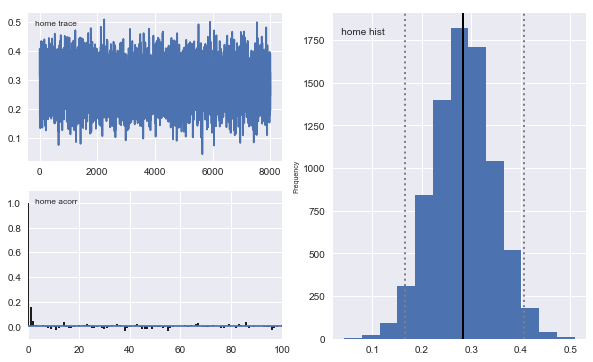

In [18]:
pymc.Matplot.plot(home)

In [105]:
df_observed = pd.read_csv('/Users/TracyShields/pl2017table.txt', 
                          delimiter='\t')

#df_observed.drop('Qualification or relegation', axis=1, inplace=True)
df_observed.columns
df_observed.rename(columns={'Team v t e':'team', 'Qualification or relegation':'QR' }, inplace=True)

In [106]:
df_observed.loc[df_observed.QR.isnull(), 'QR'] = ''

In [145]:
teams.team.values

array(['ARS', 'BOU', 'BUR', 'CHE', 'CRY', 'EVE', 'HUL', 'LEI', 'LIV',
       'MCI', 'MUN', 'MID', 'SOU', 'STK', 'SUN', 'SWA', 'TOT', 'WAT',
       'WBA', 'WHU'], dtype=object)

In [107]:
df_avg = pd.DataFrame({'avg_att': atts.stats()['mean'],
                       'avg_def': defs.stats()['mean']}, 
                      index= teams.team.values)


/Users/TracyShields/anaconda/envs/stats/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [108]:
df_observed.QR[:4] = 'champs_league'

/Users/TracyShields/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
df_observed.QR[4] = 'europa_league'

/Users/TracyShields/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
df_observed.QR[6] = 'europa_league'

/Users/TracyShields/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
df_observed.QR[5] = 'champs_league'

/Users/TracyShields/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
df_observed.QR[17:] = 'relegation'

/Users/TracyShields/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
df_observed

,Pos,team,Pld,W,D,L,GF,GA,GD,Pts,QR
0,1,Chelsea (C),38,30,3,5,85,33,+52,93,champs_league
1,2,Tottenham Hotspur,38,26,8,4,86,26,+60,86,champs_league
2,3,Manchester City,38,23,9,6,80,39,+41,78,champs_league
3,4,Liverpool,38,22,10,6,78,42,+36,76,champs_league
4,5,Arsenal,38,23,6,9,77,44,+33,75,europa_league
5,6,Manchester United,38,18,15,5,54,29,+25,69,champs_league
6,7,Everton,38,17,10,11,62,44,+18,61,europa_league
7,8,Southampton,38,12,10,16,41,48,−7,46,
8,9,AFC Bournemouth,38,12,10,16,55,67,−12,46,
9,10,West Bromwich Albion,38,12,9,17,43,51,−8,45,


In [122]:
teams

,team,i
0,ARS,0
1,BOU,1
2,BUR,2
3,CHE,3
4,CRY,4
5,EVE,5
6,HUL,6
7,LEI,7
8,LIV,8
9,MCI,9


In [123]:
df_observed['team'] =  ['CHE', 'TOT', 'MCI', 'LIV', 
                            'ARS','MUN', 'EVE', 'SOU', 
                            'BOU','WBA', 'WHU', 'LEI', 
                            'STK','CRY', 'SWA', 'BUR',
                            'WAT', 'HUL', 'MID', 'SUN'
                             ]

In [124]:
df_observed

,Pos,team,Pld,W,D,L,GF,GA,GD,Pts,QR
0,1,CHE,38,30,3,5,85,33,+52,93,champs_league
1,2,TOT,38,26,8,4,86,26,+60,86,champs_league
2,3,MCI,38,23,9,6,80,39,+41,78,champs_league
3,4,LIV,38,22,10,6,78,42,+36,76,champs_league
4,5,ARS,38,23,6,9,77,44,+33,75,europa_league
5,6,MUN,38,18,15,5,54,29,+25,69,champs_league
6,7,EVE,38,17,10,11,62,44,+18,61,europa_league
7,8,SOU,38,12,10,16,41,48,−7,46,
8,9,BOU,38,12,10,16,55,67,−12,46,
9,10,WBA,38,12,9,17,43,51,−8,45,


In [125]:
df_avg

,avg_att,avg_def
ARS,0.360935,-0.120158
BOU,0.064217,0.216306
BUR,-0.217357,0.035961
CHE,0.445191,-0.312391
CRY,-0.070071,0.153891
EVE,0.161586,-0.124556
HUL,-0.238385,0.362885
LEI,-0.030112,0.169839
LIV,0.370137,-0.147706
MCI,0.390420,-0.199853


In [126]:
df_avg = pd.merge(df_avg, df_observed, left_index=True, right_on='team', how='left')

In [127]:
df_avg = df_avg[['team','avg_att', 'avg_def', 'Pos', 'Pts', 'QR']]

In [128]:
df_avg

,team,avg_att,avg_def,Pos,Pts,QR
4,ARS,0.360935,-0.120158,5,75,europa_league
8,BOU,0.064217,0.216306,9,46,
15,BUR,-0.217357,0.035961,16,40,
0,CHE,0.445191,-0.312391,1,93,champs_league
13,CRY,-0.070071,0.153891,14,41,
6,EVE,0.161586,-0.124556,7,61,europa_league
17,HUL,-0.238385,0.362885,18,34,relegation
11,LEI,-0.030112,0.169839,12,44,
3,LIV,0.370137,-0.147706,4,76,champs_league
2,MCI,0.390420,-0.199853,3,78,champs_league


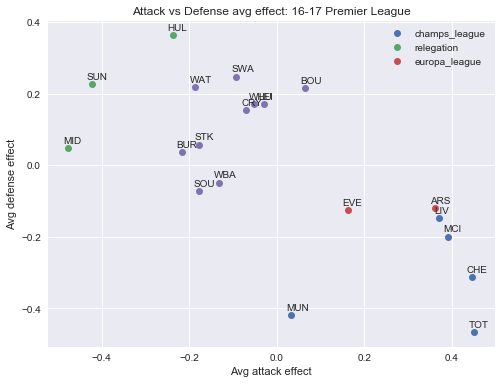

In [129]:
fig, ax = plt.subplots(figsize=(8,6))
for outcome in ['champs_league', 'relegation', 'europa_league', '']:
    ax.plot(df_avg.avg_att[df_avg.QR == outcome], 
            df_avg.avg_def[df_avg.QR == outcome], 'o', label=outcome)
    
for label, x, y in zip(df_avg.team.values, df_avg.avg_att.values, df_avg.avg_def.values):
    ax.annotate(label, xy=(x,y), xytext = (-5,5), textcoords = 'offset points')
ax.set_title('Attack vs Defense avg effect: 16-17 Premier League')
ax.set_xlabel('Avg attack effect')
ax.set_ylabel('Avg defense effect')
ax.legend();

In [138]:
def simulate_season():
    """
    Simulate a season once, using one random draw from the mcmc chain. 
    """
    num_samples = atts.trace().shape[0]
    draw = np.random.randint(0, num_samples)
    atts_draw = pd.DataFrame({'att': atts.trace()[draw, :],})
    defs_draw = pd.DataFrame({'def': defs.trace()[draw, :],})
    home_draw = home.trace()[draw]
    intercept_draw = intercept.trace()[draw]
    season = df.copy()
    season = pd.merge(season, atts_draw, left_on='i_home', right_index=True)
    season = pd.merge(season, defs_draw, left_on='i_home', right_index=True)
    season = season.rename(columns = {'att': 'att_home', 'def': 'def_home'})
    season = pd.merge(season, atts_draw, left_on='i_away', right_index=True)
    season = pd.merge(season, defs_draw, left_on='i_away', right_index=True)
    season = season.rename(columns = {'att': 'att_away', 'def': 'def_away'})
    season['home'] = home_draw
    season['intercept'] = intercept_draw
    season['home_theta'] = season.apply(lambda x: math.exp(x['intercept'] + 
                                                           x['home'] + 
                                                           x['att_home'] + 
                                                           x['def_away']), axis=1)
    season['away_theta'] = season.apply(lambda x: math.exp(x['intercept'] + 
                                                           x['att_away'] + 
                                                           x['def_home']), axis=1)
    season['home_goals'] = season.apply(lambda x: np.random.poisson(x['home_theta']), axis=1)
    season['away_goals'] = season.apply(lambda x: np.random.poisson(x['away_theta']), axis=1)
    season['home_outcome'] = season.apply(lambda x: 'win' if x['home_goals'] > x['away_goals'] else 
                                                    'loss' if x['home_goals'] < x['away_goals'] else 'draw', axis=1)
    season['away_outcome'] = season.apply(lambda x: 'win' if x['home_goals'] < x['away_goals'] else 
                                                    'loss' if x['home_goals'] > x['away_goals'] else 'draw', axis=1)
    season = season.join(pd.get_dummies(season.home_outcome, prefix='home'))
    season = season.join(pd.get_dummies(season.away_outcome, prefix='away'))
    return season


def create_season_table(season):
    """
    Using a season dataframe output by simulate_season(), create a summary dataframe with wins, losses, goals for, etc.
    
    """
    g = season.groupby('i_home')    
    home = pd.DataFrame({'home_goals': g.home_goals.sum(),
                         'home_goals_against': g.away_goals.sum(),
                         'home_wins': g.home_win.sum(),
                         'home_draws': g.home_draw.sum(),
                         'home_losses': g.home_loss.sum()
                         })
    g = season.groupby('i_away')    
    away = pd.DataFrame({'away_goals': g.away_goals.sum(),
                         'away_goals_against': g.home_goals.sum(),
                         'away_wins': g.away_win.sum(),
                         'away_draws': g.away_draw.sum(),
                         'away_losses': g.away_loss.sum()
                         })
    df = home.join(away)
    df['wins'] = df.home_wins + df.away_wins
    df['draws'] = df.home_draws + df.away_draws
    df['losses'] = df.home_losses + df.away_losses
    df['points'] = df.wins * 3 + df.draws
    df['gf'] = df.home_goals + df.away_goals
    df['ga'] = df.home_goals_against + df.away_goals_against
    df['gd'] = df.gf - df.ga
    df = pd.merge(teams, df, left_on='i', right_index=True)
    df = df.sort_index(by='points', ascending=False)
    df = df.reset_index()
    df['position'] = df.index + 1
    df['champion'] = (df.position == 1).astype(int)
    df['qualified_for_CL'] = (df.position < 5).astype(int)
    df['relegated'] = (df.position > 17).astype(int)
    return df  
    
def simulate_seasons(n=100):
    dfs = []
    for i in range(n):
        s = simulate_season()
        t = create_season_table(s)
        t['iteration'] = i
        dfs.append(t)
    return pd.concat(dfs, ignore_index=True)

In [139]:
simuls = simulate_seasons(1000)

/Users/TracyShields/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:66: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [146]:
simuls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 25 columns):
index                 20000 non-null int64
team                  20000 non-null object
i                     20000 non-null int64
home_draws            20000 non-null uint8
home_goals            20000 non-null int64
home_goals_against    20000 non-null int64
home_losses           20000 non-null uint8
home_wins             20000 non-null uint8
away_draws            20000 non-null uint8
away_goals            20000 non-null int64
away_goals_against    20000 non-null int64
away_losses           20000 non-null uint8
away_wins             20000 non-null uint8
wins                  20000 non-null uint8
draws                 20000 non-null uint8
losses                20000 non-null uint8
points                20000 non-null uint8
gf                    20000 non-null int64
ga                    20000 non-null int64
gd                    20000 non-null int64
position              20000 no

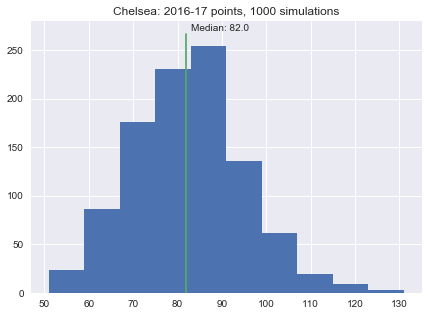

In [147]:
ax = simuls.gf[simuls.team == 'TOT'].hist(figsize=(7,5))
median = simuls.gf[simuls.team == 'TOT'].median()
ax.set_title('Chelsea: 2016-17 points, 1000 simulations')
ax.plot([median, median], ax.get_ylim())
plt.annotate('Median: %s' % median, xy=(median + 1, ax.get_ylim()[1]-10));

/Users/TracyShields/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


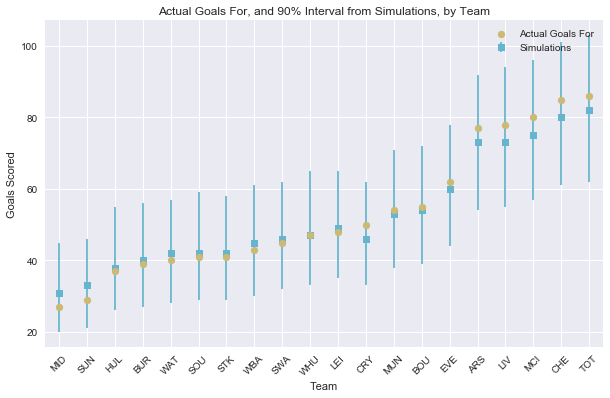

In [141]:
g = simuls.groupby('team')
season_hdis = pd.DataFrame({'points_lower': g.points.quantile(.05),
                            'points_upper': g.points.quantile(.95),
                            'goals_for_lower': g.gf.quantile(.05),
                            'goals_for_median': g.gf.median(),
                            'goals_for_upper': g.gf.quantile(.95),
                            'goals_against_lower': g.ga.quantile(.05),
                            'goals_against_upper': g.ga.quantile(.95),
                            })
season_hdis = pd.merge(season_hdis, df_observed, left_index=True, right_on='team')
column_order = ['team', 'points_lower', 'Pts', 'points_upper', 
                'goals_for_lower', 'GF', 'goals_for_median', 'goals_for_upper',
                'goals_against_lower', 'GA', 'goals_against_upper',]
season_hdis = season_hdis[column_order]
season_hdis['relative_goals_upper'] = season_hdis.goals_for_upper - season_hdis.goals_for_median
season_hdis['relative_goals_lower'] = season_hdis.goals_for_median - season_hdis.goals_for_lower
season_hdis = season_hdis.sort_index(by='GF')
season_hdis = season_hdis.reset_index()
season_hdis['x'] = season_hdis.index + .5
season_hdis

fig, axs = plt.subplots(figsize=(10,6))
axs.scatter(season_hdis.x, season_hdis.GF, c=sns.palettes.color_palette()[4], zorder = 10, label='Actual Goals For')
axs.errorbar(season_hdis.x, season_hdis.goals_for_median, 
             yerr=(season_hdis[['relative_goals_lower', 'relative_goals_upper']].values).T, 
             fmt='s', c=sns.palettes.color_palette()[5], label='Simulations')
axs.set_title('Actual Goals For, and 90% Interval from Simulations, by Team')
axs.set_xlabel('Team')
axs.set_ylabel('Goals Scored')
axs.set_xlim(0, 20)
axs.legend()
_= axs.set_xticks(season_hdis.index + .5)
_= axs.set_xticklabels(season_hdis['team'].values, rotation=45)

/Users/TracyShields/anaconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  after removing the cwd from sys.path.


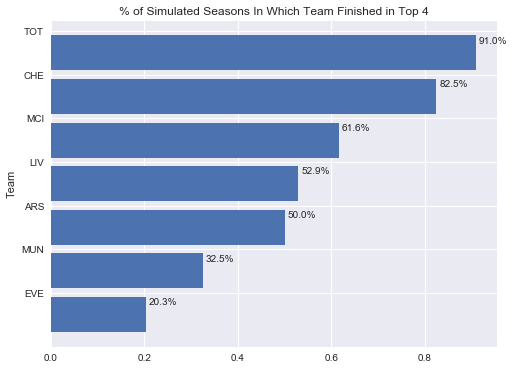

In [142]:
g = simuls.groupby('team')
df_champs = pd.DataFrame({'percent_champs': g.champion.mean(),
                          'percent_CL': g.qualified_for_CL.mean()})
df_champs = df_champs.sort_index(by='percent_CL')
df_champs = df_champs[df_champs.percent_CL > .05]
df_champs = df_champs.reset_index()

fig, ax = plt.subplots(figsize=(8,6))
ax.barh(df_champs.index.values, df_champs.percent_CL.values)

for i, row in df_champs.iterrows():
    label = "{0:.1f}%".format(100 * row['percent_CL'])
    ax.annotate(label, xy=(row['percent_CL'], i), xytext = (3, 10), textcoords = 'offset points')
ax.set_ylabel('Team')
ax.set_title('% of Simulated Seasons In Which Team Finished in Top 4')
_= ax.set_yticks(df_champs.index + .5)
_= ax.set_yticklabels(df_champs['team'].values)